In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv file
data =pd.read_csv('core_dataset.csv', low_memory=False)

#portray total count by department
dept=data['Department'].value_counts()
data.describe()

,Employee Number,Zip,Age,Pay Rate
count,3.010000e+02,301.000000,301.000000,301.000000
mean,1.205421e+09,6705.196013,38.548173,30.715249
std,1.826616e+08,17167.527864,8.942884,15.216214
min,6.020003e+08,1013.000000,25.000000,14.000000
25%,1.102024e+09,1901.000000,31.000000,20.000000
50%,1.204033e+09,2132.000000,37.000000,24.000000
75%,1.401065e+09,2421.000000,44.000000,43.000000
max,1.988300e+09,98052.000000,67.000000,80.000000


In [3]:
#convert Categorical Variable to Quantifiable values

obj_df=data.copy()
set_nums={'Performance Score': {'Exceptional': 6, 'Exceeds': 5, 'Fully Meets': 4, 
                                '90-day meets': 3, 'Needs Improvement': 2, 'PIP': 1, 'N/A- too early to review': 0}}

obj_df.replace(set_nums, inplace=True)
obj_df['Performance Score'].value_counts(sort=False).drop(0)

1      9
2     15
3     31
4    172
5     28
6      9
Name: Performance Score, dtype: int64

In [4]:
corrmat = obj_df.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

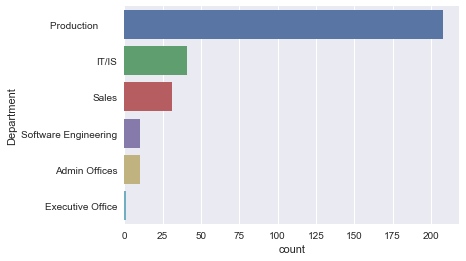

In [5]:
#graph total count of department in order
%matplotlib inline
sns.countplot(y=data['Department'], order=dept.index) #dept.index sorts it from descending order

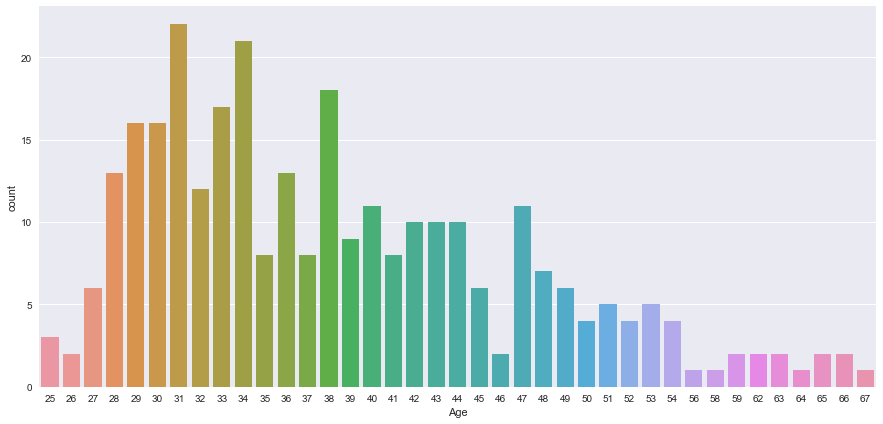

In [6]:
#graph total count by age

age=data['Age'].value_counts()
plt.figure(figsize=(15,7))
sns.countplot(x=data['Age'])

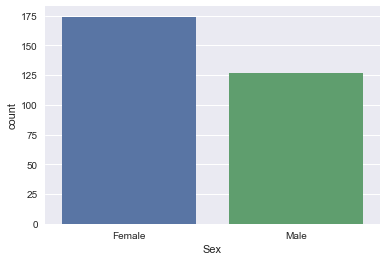

In [7]:
#graph gender

sns.countplot(x=data['Sex'])

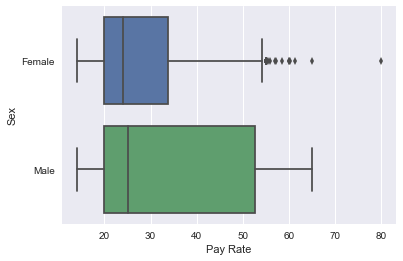

In [8]:
#show relationship between sex and pay rate

sns.boxplot(y='Sex', x='Pay Rate', data=data)

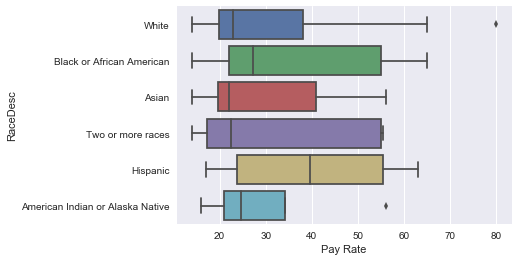

In [9]:
sns.boxplot(y='RaceDesc',x='Pay Rate', data=data)

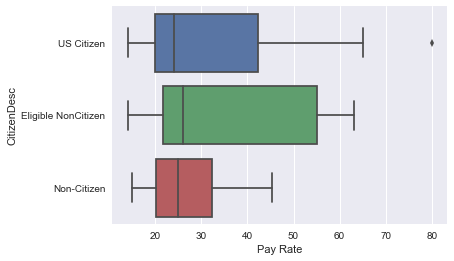

In [10]:
sns.boxplot(y='CitizenDesc', x='Pay Rate', data=data)

In [11]:
empl_stat=data['Reason For Term'].value_counts()[1:]
print(empl_stat)

Another position                    20
unhappy                             14
more money                          11
N/A - Has not started yet           11
hours                                9
career change                        9
attendance                           7
return to school                     5
relocation out of area               5
military                             4
performance                          4
retiring                             4
maternity leave - did not return     3
no-call, no-show                     3
medical issues                       3
gross misconduct                     1
Name: Reason For Term, dtype: int64


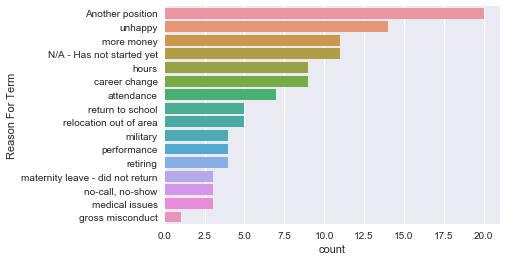

In [12]:
sns.countplot(y=data['Reason For Term'], order=empl_stat.index)

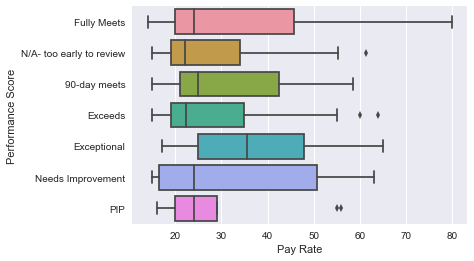

In [13]:
sns.boxplot(y='Performance Score', x='Pay Rate', data=data)

In [14]:
print (data['Performance Score'].value_counts())
print ('\n')

#convert Categorical Variable to Quantifiable values

obj_df=data.copy()
set_nums={'Performance Score': {'Exceptional': 6, 'Exceeds': 5, 'Fully Meets': 4, 
                                '90-day meets': 3, 'Needs Improvement': 2, 'PIP': 1, 'N/A- too early to review': 0}}

obj_df.replace(set_nums, inplace=True)
obj_df['Performance Score'].value_counts(sort=False).drop(0)

Fully Meets                 172
N/A- too early to review     37
90-day meets                 31
Exceeds                      28
Needs Improvement            15
PIP                           9
Exceptional                   9
Name: Performance Score, dtype: int64




1      9
2     15
3     31
4    172
5     28
6      9
Name: Performance Score, dtype: int64

In [15]:
score=obj_df['Performance Score']
score[score>0].value_counts()

4    172
3     31
5     28
2     15
6      9
1      9
Name: Performance Score, dtype: int64

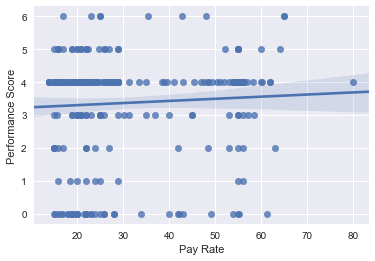

In [16]:
sns.regplot( y=score, x='Pay Rate', data=data)

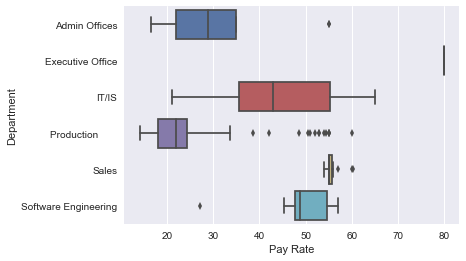

In [17]:
sns.boxplot(y='Department', x='Pay Rate', data=data)

In [18]:
data[['Performance Score', 'Pay Rate', 'Age']].groupby(['Performance Score'], as_index=True).mean()

,Pay Rate,Age
Performance Score,,
90-day meets,31.836129,37.516129
Exceeds,30.021429,40.285714
Exceptional,38.472222,37.666667
Fully Meets,30.678837,39.505814
N/A- too early to review,28.074595,34.702703
Needs Improvement,32.700000,35.800000
PIP,29.500000,39.666667


In [19]:
data[['RaceDesc', 'Pay Rate']].groupby(['RaceDesc'], as_index=False).mean()

,RaceDesc,Pay Rate
0,American Indian or Alaska Native,30.375000
1,Asian,29.440645
2,Black or African American,34.624630
3,Hispanic,39.750000
4,Two or more races,31.264444
5,White,29.577053


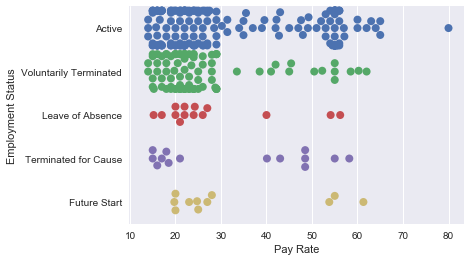

In [20]:
sns.swarmplot(y='Employment Status', x="Pay Rate",data=data,size=8)

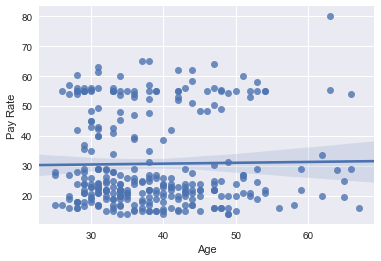

In [21]:
sns.regplot(x="Age", y='Pay Rate', data=data)

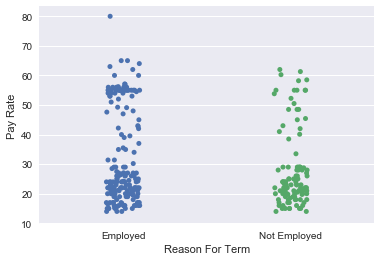

In [22]:
df_obj=data.copy()
set_nums1={'Reason For Term': {'N/A - still employed': 'Employed','Another position':"Not Employed", 'N/A - Has not started yet':"Not Employed",
            'more money':"Not Employed",'career change':"Not Employed",'hours':"Not Employed",'attendance':"Not Employed",'return to school':"Not Employed", 'relocation out of area':"Not Employed",               
            'performance':"Not Employed",'retiring':"Not Employed",'military':"Not Employed",'maternity leave - did not return':"Not Employed",'unhappy':"Not Employed",'medical issues':"Not Employed",'no-call, no-show':"Not Employed",'gross misconduct':"Not Employed"}}                   
df_obj.replace(set_nums1, inplace=True)
cd=df_obj["Reason For Term"]
sns.stripplot(y='Pay Rate',x=cd,data=df_obj,jitter=True)